# Cargar librerías esenciales

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan


# Leemos la data

In [73]:
data = pd.read_csv("/home/jeffersson/Documentos/retencion_clientes/data/retencion_clientes.csv")


In [74]:
data.columns = ["Tienda","Ventas","Utilidad_Bruta","Antiguedad_Gerente","Antiguedad_Personal","Poblacion","Nro_Competidores","Visibilidad","Flujo_Peatonal","Zona_Residencial","24_horas","Habilidad_Personal","Habilidad_Gerente","Calidad_Servicio"]

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tienda               75 non-null     int64  
 1   Ventas               75 non-null     int64  
 2   Utilidad_Bruta       75 non-null     int64  
 3   Antiguedad_Gerente   75 non-null     float64
 4   Antiguedad_Personal  75 non-null     float64
 5   Poblacion            75 non-null     int64  
 6   Nro_Competidores     75 non-null     float64
 7   Visibilidad          75 non-null     int64  
 8   Flujo_Peatonal       75 non-null     int64  
 9   Zona_Residencial     75 non-null     int64  
 10  24_horas             75 non-null     int64  
 11  Habilidad_Personal   75 non-null     float64
 12  Habilidad_Gerente    75 non-null     float64
 13  Calidad_Servicio     75 non-null     float64
dtypes: float64(6), int64(8)
memory usage: 8.3 KB


# Definimos variables para el análisis 

In [76]:
factores_humanos = ['Antiguedad_Gerente','Antiguedad_Personal','Habilidad_Personal','Habilidad_Gerente','Calidad_Servicio']
factores_ubicacion = ['Poblacion','Nro_Competidores','Visibilidad','Flujo_Peatonal','Zona_Residencial','24_horas']
factores_financieros = ['Utilidad_Bruta']

In [77]:
data.describe()

,Tienda,Ventas,Utilidad_Bruta,Antiguedad_Gerente,Antiguedad_Personal,Poblacion,Nro_Competidores,Visibilidad,Flujo_Peatonal,Zona_Residencial,24_horas,Habilidad_Personal,Habilidad_Gerente,Calidad_Servicio
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,38.000000,1.205413e+06,276313.613333,45.296444,13.931499,9825.586667,3.787751,3.080000,2.960000,0.960000,0.840000,3.456667,3.637976,87.153844
std,21.794495,3.045313e+05,89404.076338,57.671551,17.697517,5911.673770,1.311390,0.749053,0.992404,0.197279,0.369075,0.406585,0.408457,12.613392
min,1.000000,6.993060e+05,122180.000000,0.000000,0.887064,1046.000000,1.651364,2.000000,1.000000,0.000000,0.000000,2.060000,2.956667,57.895520
25%,19.500000,9.845790e+05,211003.500000,6.670391,4.394251,5616.500000,3.150664,3.000000,2.000000,1.000000,1.000000,3.225000,3.344445,78.947760
50%,38.000000,1.127332e+06,265014.000000,24.118560,7.211499,8896.000000,3.628561,3.000000,3.000000,1.000000,1.000000,3.500000,3.588889,89.473880
75%,56.500000,1.362388e+06,331313.500000,50.915125,17.215610,14104.000000,4.229525,4.000000,4.000000,1.000000,1.000000,3.655000,3.925000,99.900525
max,75.000000,2.113089e+06,518998.000000,277.987700,114.151900,26519.000000,11.127880,5.000000,5.000000,1.000000,1.000000,4.640000,4.622222,100.000000


# Planteamiento del modelo lineal

In [78]:
variables_explicativas = data.columns.to_list()[3:]

In [79]:
X = data[variables_explicativas]
y = data['Utilidad_Bruta']

X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Utilidad_Bruta   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     14.27
Date:                vie, 02 ene 2026   Prob (F-statistic):           2.77e-13
Time:                        19:48:41   Log-Likelihood:                -914.09
No. Observations:                  75   AIC:                             1852.
Df Residuals:                      63   BIC:                             1880.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.414e+05   9

## Impacto de las variables

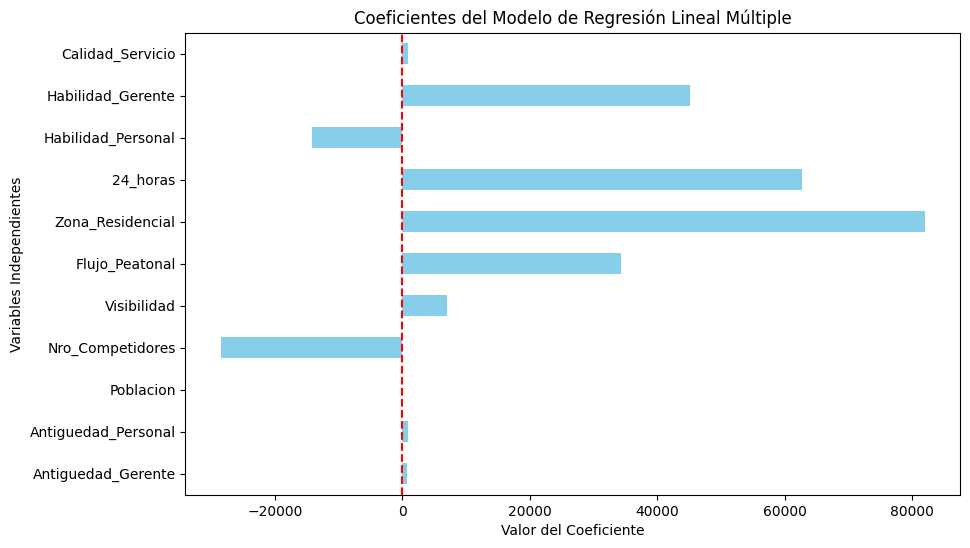

In [80]:
# Haremos un gráfico de barras horizontales de los coeficientes del modelo
coeficientes = linear_model.params[1:]  # Excluimos el intercepto
errores_estandar = linear_model.bse[1:]  # Excluimos el intercepto
plt.figure(figsize=(10, 6))
coeficientes.plot(kind='barh', color='skyblue', ecolor='black')
plt.title('Coeficientes del Modelo de Regresión Lineal Múltiple')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables Independientes')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

## Revisamos los residuos 

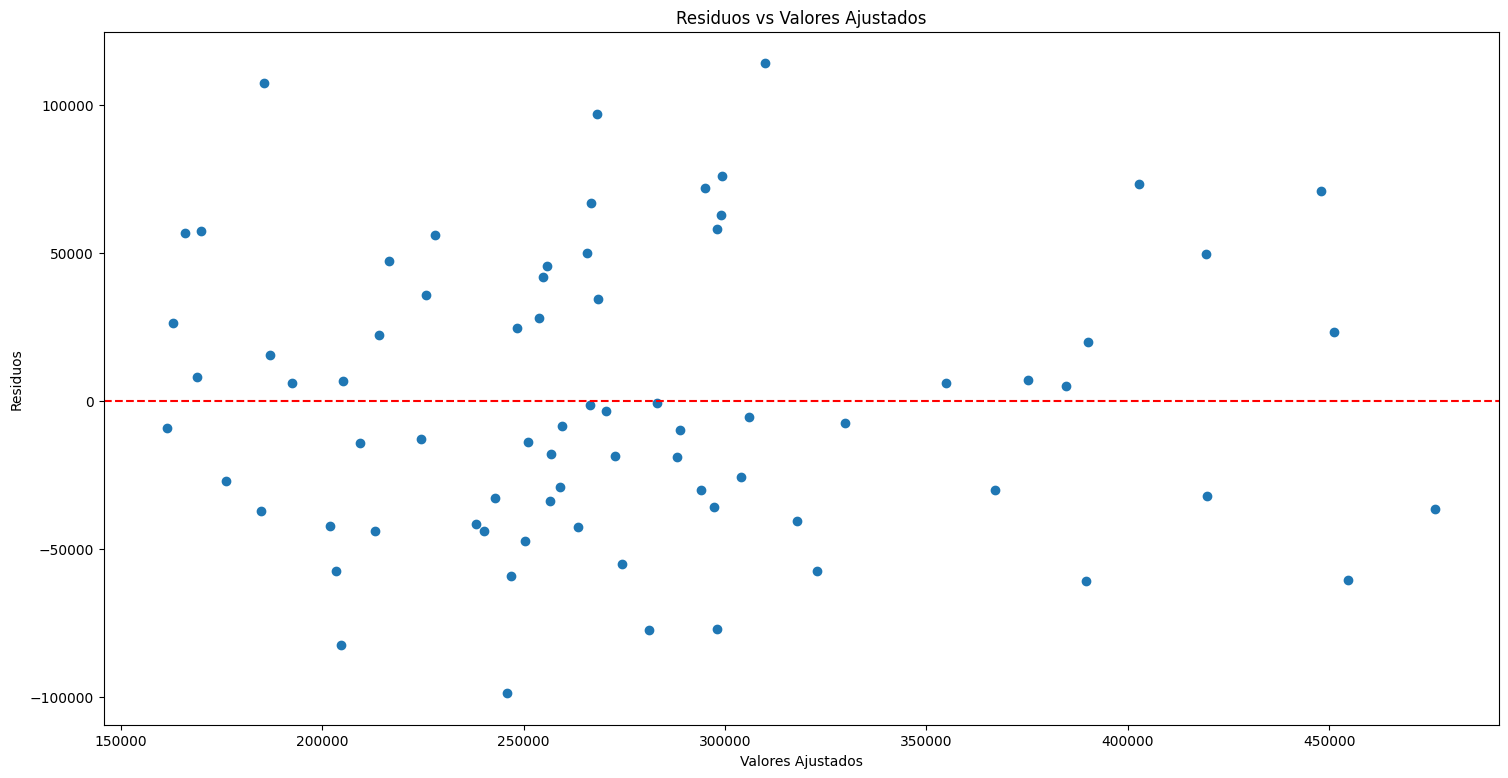

In [81]:
# Hacemos un scatter entre residuos y valores ajustados
plt.figure(figsize=(18, 9))
plt.scatter(linear_model.fittedvalues, linear_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

### Varianzas de los residuos

In [82]:
bp_test = het_breuschpagan(linear_model.resid, linear_model.model.exog)
labels = ['LM Stat','LM p-value','F Stat','F p-value']
dict(zip(labels, bp_test))

if bp_test[1] < 0.05:
    print("Rechazamos la hipótesis nula de homocedasticidad. Hay evidencia de heterocedasticidad.")
else:
    print("No rechazamos la hipótesis nula de homocedasticidad. No hay evidencia de heterocedasticidad.")


No rechazamos la hipótesis nula de homocedasticidad. No hay evidencia de heterocedasticidad.


### Verificamos VIf 

In [83]:
X = linear_model.model.exog
vif = pd.DataFrame()
vif["variable"] = linear_model.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif


,variable,VIF
0,const,269.043027
1,Antiguedad_Gerente,1.306299
2,Antiguedad_Personal,1.381389
3,Poblacion,1.909784
4,Nro_Competidores,1.264700
5,Visibilidad,1.143755
6,Flujo_Peatonal,1.870957
7,Zona_Residencial,1.415551
8,24_horas,1.288086
9,Habilidad_Personal,1.329707


# Propuesta del modelo 2

In [84]:
data.columns

Index(['Tienda', 'Ventas', 'Utilidad_Bruta', 'Antiguedad_Gerente',
       'Antiguedad_Personal', 'Poblacion', 'Nro_Competidores', 'Visibilidad',
       'Flujo_Peatonal', 'Zona_Residencial', '24_horas', 'Habilidad_Personal',
       'Habilidad_Gerente', 'Calidad_Servicio'],
      dtype='object')

In [85]:
nuevas_variables_explicativas = data.columns.to_list()[3:]

In [86]:
data['antiguedad_gerente_c'] = data['Antiguedad_Gerente'] - data['Antiguedad_Gerente'].mean()
data['antiguedad_crew_c'] = data['Antiguedad_Personal'] - data['Antiguedad_Personal'].mean()

data['antiguedad_gerente_c2'] = data['Antiguedad_Gerente']**2
data['antiguedad_crew_c2'] = data['Antiguedad_Personal']**2

In [87]:
nuevas_variables_explicativas = data.columns.to_list()[3:]

In [88]:
X_extendido = data[nuevas_variables_explicativas]
y = data['Utilidad_Bruta']
X_extendido = sm.add_constant(X_extendido)

quadratic_model = sm.OLS(y, X_extendido).fit()
print(quadratic_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Utilidad_Bruta   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     15.31
Date:                vie, 02 ene 2026   Prob (F-statistic):           1.32e-14
Time:                        19:48:42   Log-Likelihood:                -906.61
No. Observations:                  75   AIC:                             1841.
Df Residuals:                      61   BIC:                             1874.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -22.11

## Impacto de las variables

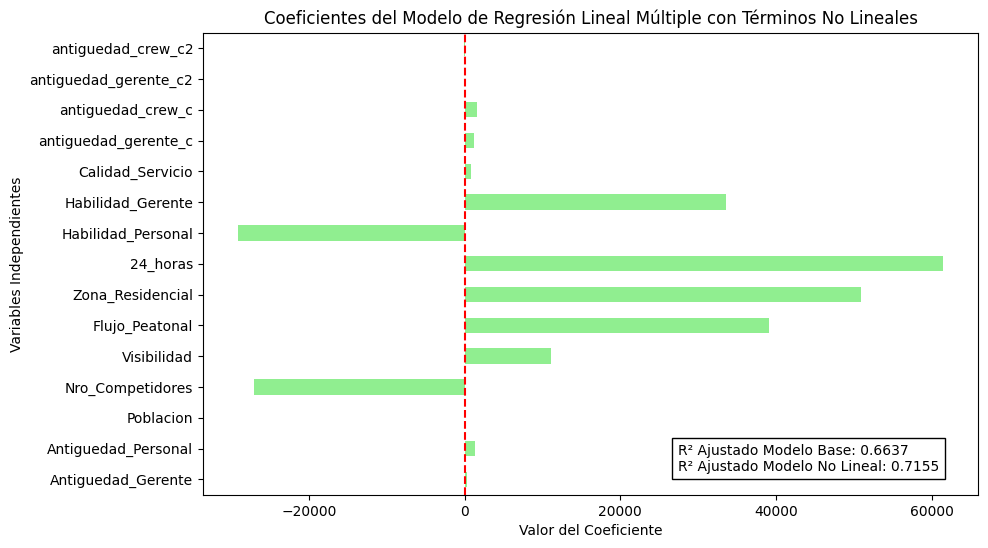

In [89]:
# Graficamos los coeficientes del nuevo modelo
coeficientes_nl = quadratic_model.params[1:]  # Excluimos el intercepto
errores_estandar_nl = quadratic_model.bse[1:]  # Excluimos el intercepto
plt.figure(figsize=(10, 6))
coeficientes_nl.plot(kind='barh', color='lightgreen', ecolor='black')
plt.title('Coeficientes del Modelo de Regresión Lineal Múltiple con Términos No Lineales')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables Independientes')
plt.axvline(x=0, color='red', linestyle='--')

# Añadiremos un cuadro con los valores de R² ajustado de ambos modelos
r2_base = linear_model.rsquared_adj
r2_nl = quadratic_model.rsquared_adj
plt.figtext(0.6, 0.15, f'R² Ajustado Modelo Base: {r2_base:.4f}\nR² Ajustado Modelo No Lineal: {r2_nl:.4f}',
            bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

## Revisamos los residuos

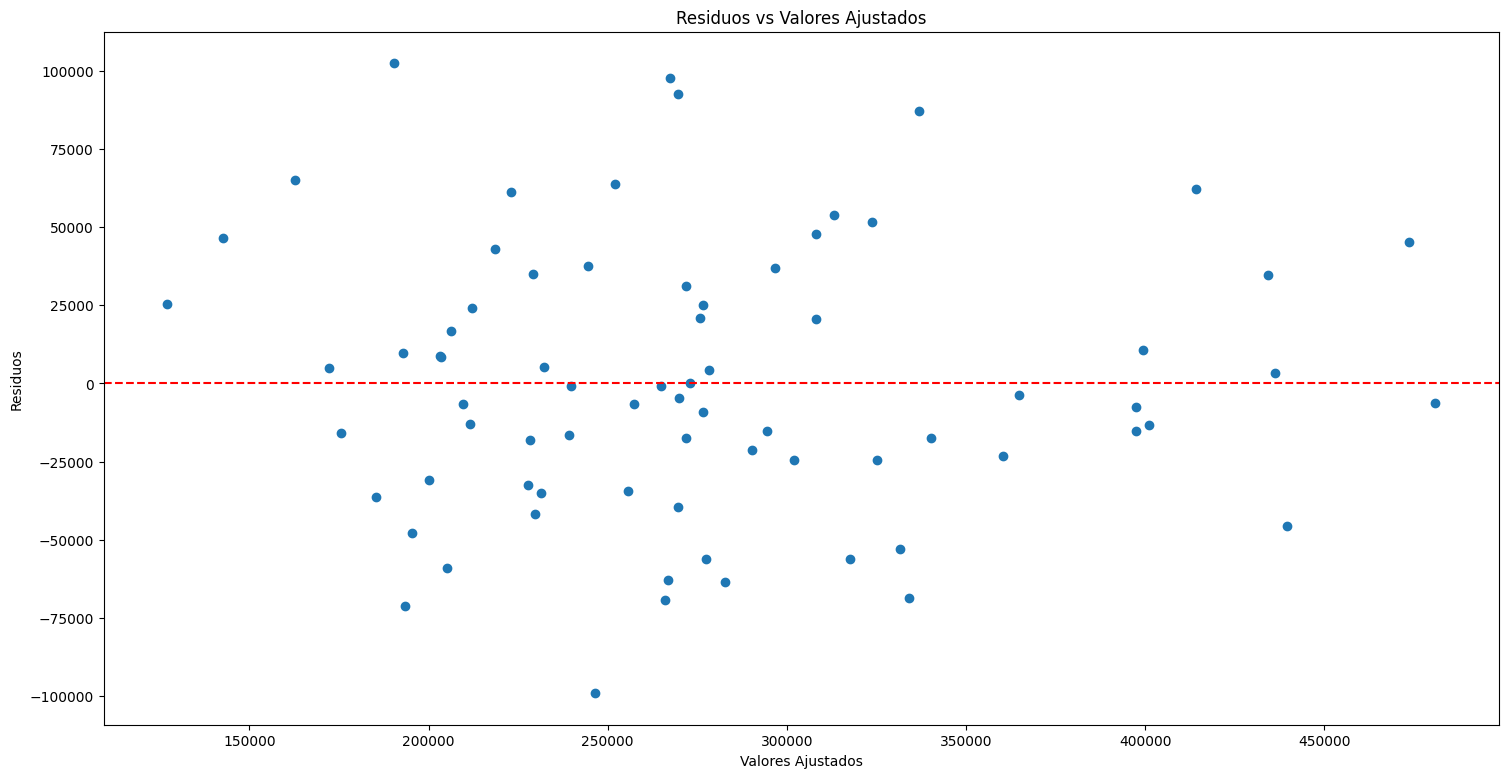

In [90]:
# Hacemos un scatter entre residuos y valores ajustados
plt.figure(figsize=(18, 9))
plt.scatter(quadratic_model.fittedvalues, quadratic_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

In [91]:
quadratic_model.params

const                      -22.116239
Antiguedad_Gerente         253.748749
Antiguedad_Personal       1300.616057
Poblacion                    3.560476
Nro_Competidores        -27112.102731
Visibilidad              11123.893166
Flujo_Peatonal           39131.188173
Zona_Residencial         50892.745959
24_horas                 61433.631366
Habilidad_Personal      -29072.466493
Habilidad_Gerente        33534.579709
Calidad_Servicio           853.430931
antiguedad_gerente_c      1255.535708
antiguedad_crew_c         1608.728403
antiguedad_gerente_c2       -3.954650
antiguedad_crew_c2         -21.686792
dtype: float64

# Otros modelos 

In [92]:
# Modelo ubicacion 

X_ubicacion = data[factores_ubicacion]
y = data['Utilidad_Bruta']

X_ubicacion = sm.add_constant(X_ubicacion)
ubicacion_model = sm.OLS(y, X_ubicacion).fit()
print(ubicacion_model.summary())



                            OLS Regression Results                            
Dep. Variable:         Utilidad_Bruta   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     6.261
Date:                vie, 02 ene 2026   Prob (F-statistic):           2.83e-05
Time:                        19:48:43   Log-Likelihood:                -944.49
No. Observations:                  75   AIC:                             1903.
Df Residuals:                      68   BIC:                             1919.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.389e+04   8.25e+04  

In [93]:
# Modelo factores humanos

X_humanos = data[factores_humanos]
y = data['Utilidad_Bruta']

X_humanos = sm.add_constant(X_humanos)
humanos_model = sm.OLS(y, X_humanos).fit()
print(humanos_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Utilidad_Bruta   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6.641
Date:                vie, 02 ene 2026   Prob (F-statistic):           4.21e-05
Time:                        19:48:43   Log-Likelihood:                -946.25
No. Observations:                  75   AIC:                             1905.
Df Residuals:                      69   BIC:                             1918.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.085e+05   1

In [94]:
# Solo ubicación
X_ubicacion = data[factores_ubicacion]
y = data['Utilidad_Bruta']


In [95]:
pd.DataFrame({
    "Modelo": ["Ubicación", "Humanos", "Completo",'No Lineal'],
    "R2_adj": [
        ubicacion_model.rsquared_adj,
        humanos_model.rsquared_adj,
        linear_model.rsquared_adj,
        quadratic_model.rsquared_adj
    ],
    "AIC": [
        ubicacion_model.aic,
        humanos_model.aic,
        linear_model.aic,
        quadratic_model.aic
    ]
})


,Modelo,R2_adj,AIC
0,Ubicación,0.299000,1902.986908
1,Humanos,0.275974,1904.505754
2,Completo,0.663670,1852.177784
3,No Lineal,0.715467,1841.214903


In [ ]:
print("""
      
Conclusión:
-----------------------------------------------------------------------

- La antigüedad tiene un efecto positivo pero decreciente.
- El impacto marginal es mayor en tiendas con baja antigüedad.
- Los factores humanos son comparables o superiores a la ubicación.
- Las políticas de incentivos deben ser diferenciadas.

"""
)



Conclusión:
-----------------------------------------------------------------------

- La antigüedad tiene un efecto positivo pero decreciente.
- El impacto marginal es mayor en tiendas con baja antigüedad.
- Los factores humanos son comparables o superiores a la ubicación.
- Las políticas de incentivos deben ser diferenciadas.




In [97]:
X_extendido = data[nuevas_variables_explicativas].drop(columns = ['Antiguedad_Gerente','Antiguedad_Personal'])
y = data['Utilidad_Bruta']
X_extendido = sm.add_constant(X_extendido)

quadratic_model = sm.OLS(y, X_extendido).fit()
print(quadratic_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Utilidad_Bruta   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     15.31
Date:                vie, 02 ene 2026   Prob (F-statistic):           1.32e-14
Time:                        19:48:43   Log-Likelihood:                -906.61
No. Observations:                  75   AIC:                             1841.
Df Residuals:                      61   BIC:                             1874.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.959e+